In [ ]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 13.0 MB/s 
     |████████████████████████████████| 5.8 MB 86.4 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 118 kB 90.5 MB/s 
     |████████████████████████████████| 1.1 MB 55.0 MB/s 
     |████████████████████████████████| 1.3 MB 77.6 MB/s 
     |████████████████████████████████| 238 kB 100.2 MB/s 
     |████████████████████████████████| 352 kB 87.6 MB/s 
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 5.9 MB 78.1 MB/s 
     |████████████████████████████████| 578.1 MB 6.4 kB/s 
     |████████████████████████████████| 578.1 MB 5.4 kB/s 
     |████████████████████████████████| 4.6 MB 83.2 MB/s 


In [ ]:
# A dependency of the preprocessing for BERT inputs
!pip install -q -U "tensorflow-text==2.8.*"


ERROR: Operation cancelled by user


In [ ]:
import os
import shutil
import pandas as pd
import tensorflow as tf
# import tensorflow_hub as hub
# import tensorflow_text as text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.corpus import stopwords
import nltk

STOPWORDS = set(stopwords.words('english'))

# from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

tf.get_logger().setLevel('ERROR')

In [ ]:
df = pd.read_csv('train.csv')
df1 = pd.read_csv('train.csv')
df

,id,name,document_text,cat_name
0,22474,Information Regarding the Merger of Navios Mar...,"At a special meeting held on March 24, 2021 sh...",Corporate Communications
1,27460,Announcement on Approving the Change of Member...,"On April 2, 2021, the China Financial Futures ...",Securities Settlement
2,6926,SFC Suspends Shiu Yau Wah for Five Months,The Securities and Futures Commission (SFC) ha...,Antitrust
3,6982,"Renminbi RMB Haircut - February 4, 2020",Pursuant to Section 2.6.2 of the Clearing Hous...,Securities Settlement
4,5022,"Anti-Money Laundering, Countering Financing of...",Money laundering and terrorism financing (ML/T...,Financial Crime
...,...,...,...,...
47097,14825,Guide to the 2020 NSCC Fee Schedule,National Securities Clearing Corporation (NSCC...,Corporate Governance
47098,6875,Analytical Accounts of the Exchange Fund,"On January 14, 2020, the Hong Kong Monetary Au...",Monetary and Economic Policy
47099,8901,Adjudication Order In The Matter of Chiranjila...,Securities and Exchange Board of India ('SEBI'...,Fraud
47100,6285,Section 19 Letter for Criminal Conviction - Pr...,"The Federal Reserve Bank of Atlanta (""Reserve ...",Exemptions


In [ ]:
df_test = pd.read_csv('test.csv')
df_test1 = pd.read_csv('test.csv')

In [ ]:
from collections import defaultdict

texts = {}
cats = defaultdict(list)

for r in df.itertuples():
    i = r.id
    if i not in texts:
        texts[i] = r.name + ' ' + r.document_text
    cats[i].append(r.cat_name)

In [ ]:
texts = {k:v for k, v in sorted(texts.items(), key=lambda x: x[0])}
cats = {k:v for k, v in sorted(cats.items(), key=lambda x: x[0])}

In [ ]:
texts = list(texts.values())
cats = list(cats.values())

In [ ]:
texts_test = []

for r in df_test.itertuples():
    texts_test.append(r.name + ' ' + r.document_text)

In [ ]:
df[df['name'] == 'Consent Order in the Matter of Solium Financial Services LLC']

,id,name,document_text,cat_name
1602,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Licensure and certification
3140,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Definitions
18990,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Licensing
19426,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Legal
25482,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Legal Proceedings
34021,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Compliance Management
35643,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...",Broker Dealer


In [ ]:
texts[0], cats[0]

('Consent Order in the Matter of Solium Financial Services LLC Solium Financial Services LLC ("SFS") is a broker-dealer with a principal place of business at 50 Tice Boulevard, Suite A-18 Woodcliff Lake, New Jersey 07677, and is registered as a broker-dealer with the Alabama Securities Commission ("Commission"). During the period from at least January 2009 to June 6, 2019, SFS acted as broker-dealer in Alabama as the term broker-dealer is defined by Title 8, Chapter 6, 8-6-2 of the Act. Code of Alabama, 8-6-3(a) states that it is unlawful for a person to transact business in Alabama as a broker-dealer or agent unless such person is registered under the Act. By engaging in the conduct set forth above, SFS acted as an unregistered broker-dealer in Alabama in violation of 8-6-3(a) of the Act. This Order concludes the investigation by the Commission and any other action that the Commission could commence under applicable Alabama law as it relates to the substance of the Findings of Fact an

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

multiLabelBinarizer = MultiLabelBinarizer()
catClasses = multiLabelBinarizer.fit_transform(cats)

In [ ]:
multiLabelBinarizer.classes_

array(['Accounting and Finance', 'Antitrust', 'Banking', 'Broker Dealer',
       'Commodities Trading', 'Compliance Management',
       'Consumer protection', 'Contract Provisions',
       'Corporate Communications', 'Corporate Governance', 'Definitions',
       'Delivery', 'Examinations', 'Exemptions', 'Fees and Charges',
       'Financial Accounting', 'Financial Crime', 'Forms', 'Fraud',
       'IT Risk', 'Information Filing', 'Insurance', 'Legal',
       'Legal Proceedings', 'Licensing', 'Licensure and certification',
       'Liquidity Risk', 'Listing', 'Market Abuse', 'Market Risk',
       'Monetary and Economic Policy', 'Money Services',
       'Money-Laundering and Terrorist Financing', 'Natural Disasters',
       'Payments and Settlements', 'Powers and Duties', 'Quotation',
       'Records Maintenance', 'Regulatory Actions',
       'Regulatory Reporting', 'Required Disclosures', 'Research',
       'Risk Management', 'Securities Clearing', 'Securities Issuing',
       'Securities

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47102 entries, 0 to 47101
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             47102 non-null  int64 
 1   name           47102 non-null  object
 2   document_text  47102 non-null  object
 3   cat_name       47102 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


In [ ]:
import re
import string

class Preprocesser(object):
    def __init__(self, punctuation=True, url=True, number=True):
        self.punctuation = punctuation
        self.url = url
        self.number = number
    
    def apply(self, text):
        
        text = self._lowercase(text)
        
        if self.url:
            text = self._remove_url(text)
            
        if self .punctuation:
            text = self._remove_punctuation(text)
            
        if self.number:
            text = self._remove_number(text)
        
        text = re.sub(r'\s+', ' ', text)
            
        return text
    
        
    def _remove_punctuation(self, text):
        ''' Please fill this function to remove all the punctuations in the text
        '''
        ### Start your code
        # Using the translator object that is builtin with for string objects in python. 
        # We filter out the characters that are identified as punctuation.
        text = text.translate(str.maketrans('', '', string.punctuation))
        ### End
        
        return text
    
    def _remove_url(self, text):
        ''' Please fill this function to remove all the urls in the text
        '''
        ### Start your code
        # Using regular expression, we remove all urls that start with http
        text = re.sub(r'http\S+', '', text)
        ### End
        
        return text
    
    def _remove_number(self, text):
        ''' Please fill this function to remove all the numbers in the text
        '''
        
        ### Start your code
        # Using regular expression to remove all numbers
        text = re.sub(r'\d+', '', text)
        ### End
        
        return text
    
    def _lowercase(self, text):
        ''' Please fill this function to lowercase the text
        '''
        
        ### Start your code

        # Using string.lower() method to conver the string to lower case
        text = text.lower()
        ### End
        
        return text

In [ ]:
from nltk.stem import WordNetLemmatizer

def tokenize(text):
    ''' Please fill this function to tokenize text.
            1. Tokenize the text.
            2. Remove stop words.
            3. Optional: lemmatize words accordingly.
    '''
    
    ### Start your code
    # Using regular expression to split the text into individual words. 
    tokens = re.split('\W+', text)

    # Using the stopwords corpus downloaded from the nltk package, remove the stopwords from the tokens.
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [tok for tok in tokens if tok not in stopwords]

    # Using nltk package for lemmatization of word tokens.
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    
    ### End
    
    return tokens

In [ ]:
processor = Preprocesser()
cleaned_texts = [processor.apply(t) for t in texts]

In [ ]:
from wordcloud import WordCloud
all_words_string = ' '.join(cleaned_texts)
wc = WordCloud(background_color="white", max_words=200)
wc.generate(all_words_string)
wc.to_file('cloud0.png')

In [ ]:
classes_name_word = df1['cat_name'].tolist()

In [ ]:
from wordcloud import WordCloud
all_words_string = ' '.join(classes_name_word)
wc = WordCloud(background_color="white", max_words=200)
wc.generate(all_words_string)
wc.to_file('cloud1.png')

In [ ]:
tokenized = np.array(cleaned_texts, dtype=object)
catClasses = np.array(catClasses)

In [ ]:
tokenized_test = np.array(texts_test)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(tokenized, catClasses, random_state=42)

In [ ]:
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((7394,), (2465,), (7394, 50), (2465, 50))

In [ ]:
from collections import defaultdict
from tqdm.notebook import tqdm

class TfIdfExtractor(object):
    
    def __init__(self, vocab_size=None):
        self.vocab_size = vocab_size
        
        self.vocab = defaultdict(lambda: 0)
        self.word2idx = {}
        self.df = defaultdict(lambda: 0)
        self.num_doc = 0
        
        self.processer = Preprocesser()
        
        
    def fit(self, texts):
        ''' In this function, you are required to implement the fitting process.
                1. Construct the vocabulary (self.vocab).
                2. Construct the document frequency dictionary (self.df).
                3. Sort the vocabulary based on the frequency (self.vocab).
            Input:
                texts: a list of text (training set)
            Output:
                None
        '''

        self.num_doc = len(texts)
        
        for text in tqdm(texts, desc='fitting text'):
            clean_text = self.processer.apply(text)
            tokens = tokenize(clean_text)
            
            ### Start your code (step 1 & 2)

            # Identifying the unique words in the document and their frequency.

            for token in set(tokens):
                self.df[token] += 1
                self.vocab[token] += 1

            ### End
        
        ### Start your code (Step 3)

        N = len(texts)
        for item in self.df.items():
            self.df[item[0]] = item[1]/N

        # Sorting the vocabulary based on the most frequent words
        self.vocab = dict(sorted(self.vocab.items(), key=lambda x: x[1], reverse=True))
        
        ### End
        
        if self.vocab_size is not None:
            self.vocab = {key: self.vocab[key] for key in list(self.vocab.keys())[:self.vocab_size]}
        
        self.word2idx = {key: idx for idx, key in enumerate(self.vocab.keys())}


    def transform(self, texts):
        ''' In this function, you need to encode the input text into TF-IDF vector.
            Input:
                texts: a list of text.
            Ouput:
                a N-d matrix (Tf-Idf) 
        '''
        tfidf = np.zeros((len(texts), len(self.vocab)))
        
        for i, text in tqdm(enumerate(texts), desc='transforming', total=len(texts)):
            clean_text = self.processer.apply(text)
            tokens = tokenize(clean_text)
            
            ### Start your code
            for token in tokens:
                if token in self.word2idx.keys():
                    tfidf[i, self.word2idx[token]] += 1

            # Calculating tf-idf value for each word.
            for token in set(tokens):
                if token in self.word2idx.keys():
                    tfidf[i, self.word2idx[token]] = (tfidf[i, self.word2idx[token]]/len(tokens)) * np.log(len(texts)/self.df[token])
            ### End
        
        return tfidf

In [ ]:
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# You can change this number to see the difference of the performances. (larger vocab size needs more memory)
vocab_size = 10000
num_class = 50

extractor = TfIdfExtractor(vocab_size=vocab_size)
extractor.fit(x_train)

x_train = extractor.transform(x_train)
x_valid = extractor.transform(x_valid)
# x_test = extractor.transform(text_test)


fitting text:   0%|          | 0/7394 [00:00<?, ?it/s]

transforming:   0%|          | 0/7394 [00:00<?, ?it/s]

transforming:   0%|          | 0/2465 [00:00<?, ?it/s]

In [ ]:
x_test = extractor.transform(texts_test)

transforming:   0%|          | 0/4993 [00:00<?, ?it/s]

In [ ]:
print('The size of training set:', x_train.shape)
print('The size of validation set:', x_valid.shape)
print('The size of test set:', x_test.shape)

The size of training set: (7394, 10000)
The size of validation set: (2465, 10000)
The size of test set: (4993, 10000)


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import roc_auc_score, f1_score

In [ ]:
clf = MultiOutputClassifier(KNeighborsClassifier()).fit(x_train, y_train)
predictions_val = clf.predict(x_valid)
print('AUC score: {}'.format(roc_auc_score(y_valid,predictions_val)))
f1_score(y_valid, predictions_val, average='macro')

AUC score: 0.7133886663333721


0.5207637915801616

In [ ]:

clf = MultiOutputClassifier(RandomForestClassifier()).fit(x_train, y_train)
predictions_val = clf.predict(x_valid)
print('AUC score: {}'.format(roc_auc_score(y_valid,predictions_val)))
f1_score(y_valid, predictions_val, average='macro')


AUC score: 0.7430250808942529


0.6305970721286565

In [ ]:
clf = MultiOutputClassifier(DecisionTreeClassifier()).fit(x_train, y_train)
predictions_val = clf.predict(x_valid)
print('AUC score: {}'.format(roc_auc_score(y_valid,predictions_val)))
f1_score(y_valid, predictions_val, average='macro')

AUC score: 0.862383940332047


0.7584789803925909

In [ ]:
clf = MultiOutputClassifier(GaussianNB()).fit(x_train, y_train)
predictions_val = clf.predict(x_valid)
print('AUC score: {}'.format(roc_auc_score(y_valid,predictions_val)))
f1_score(y_valid, predictions_val, average='macro')

AUC score: 0.716935331729956


0.4729070377759341

In [ ]:
from sklearn.svm import SVC
clf = MultiOutputClassifier(SVC()).fit(x_train, y_train)
predictions_val = clf.predict(x_valid)
print('AUC score: {}'.format(roc_auc_score(y_valid,predictions_val)))
f1_score(y_valid, predictions_val, average='macro')

AUC score: 0.7467812825337711


0.6302329709016986

In [ ]:
from keras import backend as K

def balanced_recall(y_true, y_pred):
    """This function calculates the balanced recall metric
    recall = TP / (TP + FN)
    """
    recall_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true_class, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        recall_by_class = recall_by_class + recall
    return recall_by_class / y_pred.shape[1]

def balanced_precision(y_true, y_pred):
    """This function calculates the balanced precision metric
    precision = TP / (TP + FP)
    """
    precision_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred_class, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        precision_by_class = precision_by_class + precision
    # return average balanced metric for each class
    return precision_by_class / y_pred.shape[1]

def balanced_f1_score(y_true, y_pred):
    """This function calculates the F1 score metric"""
    precision = balanced_precision(y_true, y_pred)
    recall = balanced_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, lower=True)
tokenizer.fit_on_texts(tokenized)
sequences = tokenizer.texts_to_sequences(tokenized)
x = pad_sequences(sequences, maxlen=800)

In [ ]:
xt_train, xt_valid, yt_train, yt_valid = train_test_split(x, catClasses, test_size=0.20, random_state=23)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

In [ ]:
METRICS = [
      tf.keras.metrics.AUC(),
      balanced_recall,
      balanced_precision,
      balanced_f1_score
]
model = Sequential()
model.add(Embedding(10000, 20, input_length=800))
model.add(GlobalMaxPool1D())
model.add(Dense(50, activation='sigmoid'))
model.compile(optimizer=Adam(0.01), loss='binary_crossentropy', metrics=METRICS)

In [ ]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

callbacks = [
    ReduceLROnPlateau(),
    EarlyStopping(patience=10),
    ModelCheckpoint(filepath='model-simple.h5', save_best_only=True)
]
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 800, 20)           200000    
                                                                 
 global_max_pooling1d_2 (Glo  (None, 20)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 50)                1050      
                                                                 
Total params: 201,050
Trainable params: 201,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(xt_train, yt_train, epochs=30, batch_size=32, validation_split=0.20, callbacks=callbacks)

Epoch 30/30

198/198 [==============================] - 3s 16ms/step - loss: 0.1910 - auc_2: 0.8997 - balanced_recall: 0.3614 - balanced_precision: 0.5250 - balanced_f1_score: 0.4272 - val_loss: 0.2197 - val_auc_2: 0.8595 - val_balanced_recall: 0.3132 - val_balanced_precision: 0.4461 - val_balanced_f1_score: 0.3669 - lr: 0.0100

dict_keys(['loss', 'auc_2', 'balanced_recall', 'balanced_precision', 'balanced_f1_score', 'val_loss', 'val_auc_2', 'val_balanced_recall', 'val_balanced_precision', 'val_balanced_f1_score', 'lr'])


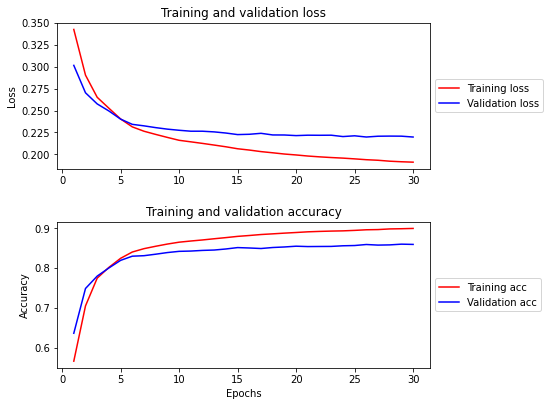

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['auc_2']
val_acc = history_dict['val_auc_2']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(8, 6))
fig.tight_layout(pad=6.0)

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(pad=2.0)


dict_keys(['loss', 'auc_2', 'balanced_recall', 'balanced_precision', 'balanced_f1_score', 'val_loss', 'val_auc_2', 'val_balanced_recall', 'val_balanced_precision', 'val_balanced_f1_score', 'lr'])


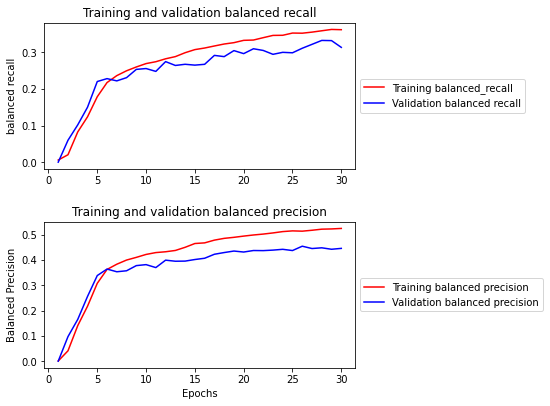

In [ ]:
history_dict = history.history
print(history_dict.keys())

balanced_recall = history_dict['balanced_recall']
val_balanced_recall = history_dict['val_balanced_recall']
balanced_precision = history_dict['balanced_precision']
val_balanced_precision = history_dict['val_balanced_precision']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(8, 6))
fig.tight_layout(pad=6.0)

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, balanced_recall, 'r', label='Training balanced_recall')
# b is for "solid blue line"
plt.plot(epochs, val_balanced_recall, 'b', label='Validation balanced recall')
plt.title('Training and validation balanced recall')
# plt.xlabel('Epochs')
plt.ylabel('balanced recall')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.subplot(2, 1, 2)
plt.plot(epochs, balanced_precision, 'r', label='Training balanced precision')
plt.plot(epochs, val_balanced_precision, 'b', label='Validation balanced precision')
plt.title('Training and validation balanced precision')
plt.xlabel('Epochs')
plt.ylabel('Balanced Precision')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(pad=2.0)

dict_keys(['loss', 'auc_2', 'balanced_recall', 'balanced_precision', 'balanced_f1_score', 'val_loss', 'val_auc_2', 'val_balanced_recall', 'val_balanced_precision', 'val_balanced_f1_score', 'lr'])


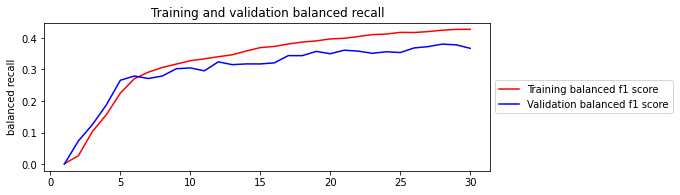

In [ ]:
history_dict = history.history
print(history_dict.keys())

balanced_f1_score = history_dict['balanced_f1_score']
val_balanced_f1_score = history_dict['val_balanced_f1_score']
lr = history_dict['lr']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(8, 6))
fig.tight_layout(pad=6.0)

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, balanced_f1_score, 'r', label='Training balanced f1 score')
# b is for "solid blue line"
plt.plot(epochs, val_balanced_f1_score, 'b', label='Validation balanced f1 score')
plt.title('Training and validation balanced recall')
# plt.xlabel('Epochs')
plt.ylabel('balanced recall')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
